In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 

In [2]:
import pandas_profiling as pp

One of the important tasks of banks is to determine whether the borrower will be able to repay the loan or not. One of the main factors affecting a person's ability to pay is his salary. This dataset contains information about customers and we want to build an effective model that will help predict a person's income level. A person receives more than 50 thousand dollars a year or less?

**Load the data into 2 variables test_df and train_df**

* Columns - Definition
* age - Age of Persons
* workclass - Describe work type
* fnlwgt - Financial Weight
* education - Person's education level
* martial status - Person's martial status
* occupation - Person's usual or principal work or business
* sex - Gender of Person
* race - Person's race
* capital gain - Person's capital gain
* capital loss - Person's capital loss
* hours per hour - Earn per hour
* native country - Persons native country
* income - Whether <50k or not

In [3]:
test_df= pd.read_csv('/kaggle/input/income/test.csv')
train_df = pd.read_csv('/kaggle/input/income/train.csv')

# EDA

In [4]:
# Let's look at the data set
train_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [5]:
train_df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0
43956,30,Private,375827,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,United-States,0


In [6]:
train_df.shape

(43957, 15)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [8]:
# Let's see the number of unique values by columns
for col in list(train_df.columns):
    print(col + ' --> ' + str(train_df[col].nunique()) + ' , data type: '  + str(train_df[col].dtype))

age --> 74 , data type: int64
workclass --> 8 , data type: object
fnlwgt --> 26646 , data type: int64
education --> 16 , data type: object
educational-num --> 16 , data type: int64
marital-status --> 7 , data type: object
occupation --> 14 , data type: object
relationship --> 6 , data type: object
race --> 5 , data type: object
gender --> 2 , data type: object
capital-gain --> 122 , data type: int64
capital-loss --> 97 , data type: int64
hours-per-week --> 94 , data type: int64
native-country --> 41 , data type: object
income_>50K --> 2 , data type: int64


The column 'fnlwgt' has 26646 unique values. This column needs to be deleted.

In [9]:
train_df = train_df.drop('fnlwgt', axis = 1)
train_df.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income_>50K'],
      dtype='object')

In [10]:
# Let's see the number of missing values in the columns
train_df.isna().sum()

age                   0
workclass          2498
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [11]:
# Let's look at the distribution of values in columns with missing values
print('-------workclass--------',train_df.workclass.value_counts(),sep='\n')
print()
print('-------occupation--------', train_df.occupation.value_counts(),sep='\n')
print()
print('------native-country------', train_df['native-country'].value_counts(),sep='\n')

-------workclass--------
Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64

-------occupation--------
Craft-repair         5519
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                4965
Other-service        4448
Machine-op-inspct    2711
Transport-moving     2121
Handlers-cleaners    1878
Farming-fishing      1348
Tech-support         1321
Protective-serv       874
Priv-house-serv       225
Armed-Forces           13
Name: occupation, dtype: int64

------native-country------
United-States                 39429
Mexico                          880
Philippines                     273
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134

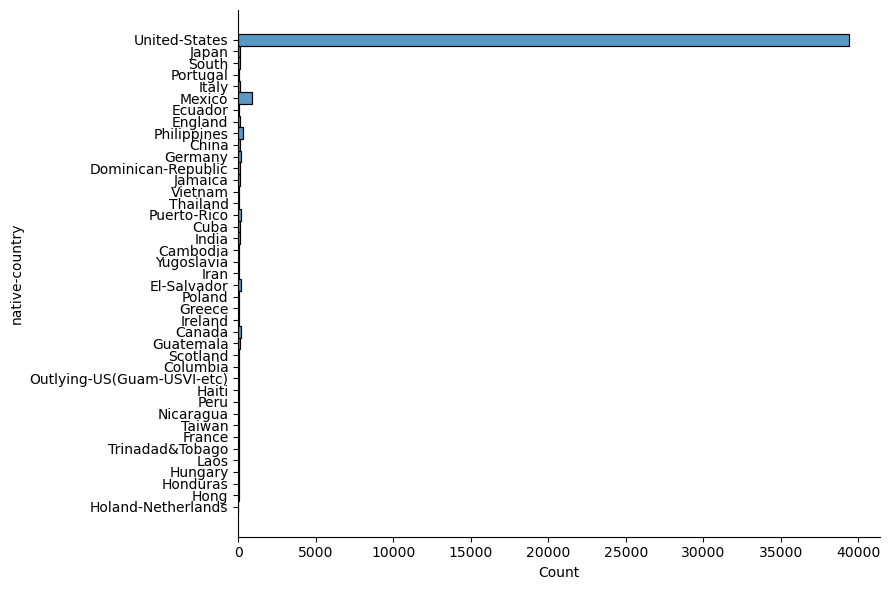

In [12]:
# let's look at the graphs of the distribution of the values of the 'native-country' column
sns.displot(train_df, y ='native-country', height= 6 , aspect= 1.5)

In [13]:
round((train_df['native-country'].value_counts().max()
       /train_df['native-country'].value_counts().sum()*100),2)

91.28

91.28 % of all people in our data come from the USA. This feature should be removed because the feature is highly unbalanced.

In [14]:
# Let's delete feature 'native-country'
train_df = train_df.drop('native-country', axis = 1)
train_df.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income_>50K'],
      dtype='object')

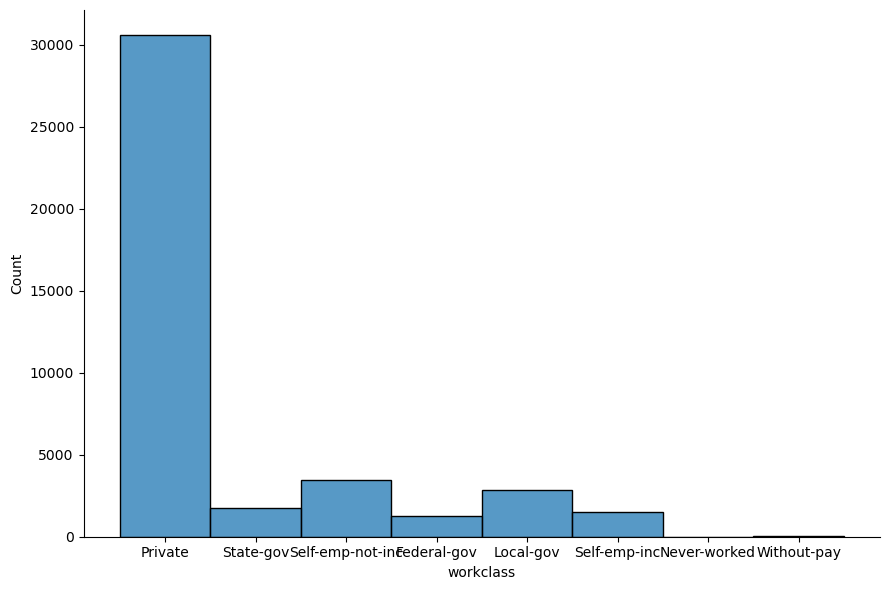

In [15]:
# Let's look at the distribution graphs of the "working class" attribute
sns.displot(train_df, x ='workclass', height= 6 , aspect= 1.5)

In [16]:
for i in train_df['workclass'].value_counts():
    print(round(i/sum(train_df['workclass'].value_counts())*100,2), '%')

73.78 %
8.36 %
6.81 %
4.24 %
3.66 %
3.1 %
0.05 %
0.02 %


The "working class" attribute has a high degree of imbalance. This attribute must be removed.

In [17]:
# Let's delete feature 'workclass'
train_df = train_df.drop('workclass', axis = 1)
train_df.columns

Index(['age', 'education', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_>50K'],
      dtype='object')

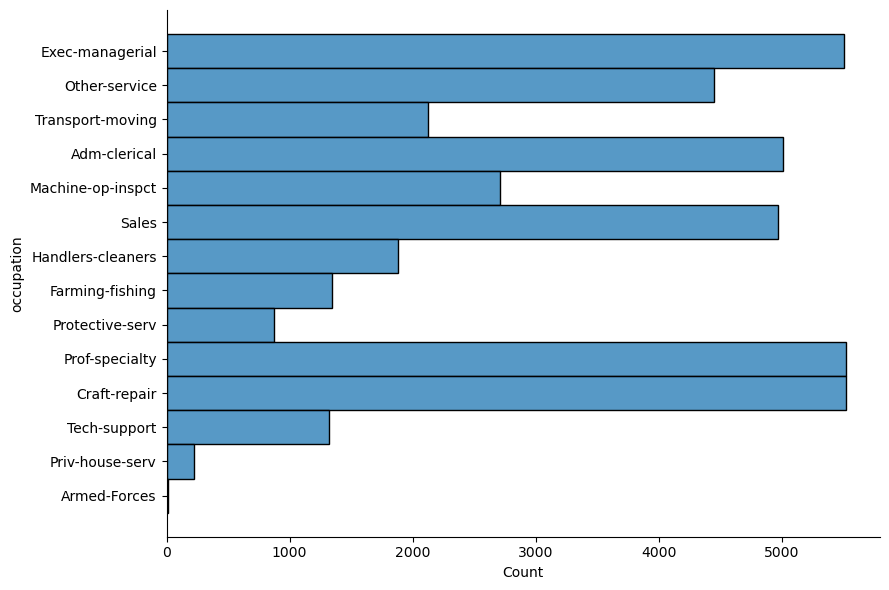

In [18]:
# #Let's look at the distribution graphs of the 'occupation' attribute
sns.displot(train_df, y = 'occupation', height= 6 , aspect= 1.5)

In [19]:
# Fill in unknown values -'unknown' 
train_df.occupation.fillna("unknown", inplace=True)

In [20]:
# Let's see the number of missing values
test_df.isna().sum().sum()

0

In [21]:
# Let's look at the main statistical indicators
train_df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


<AxesSubplot:xlabel='capital-gain'>

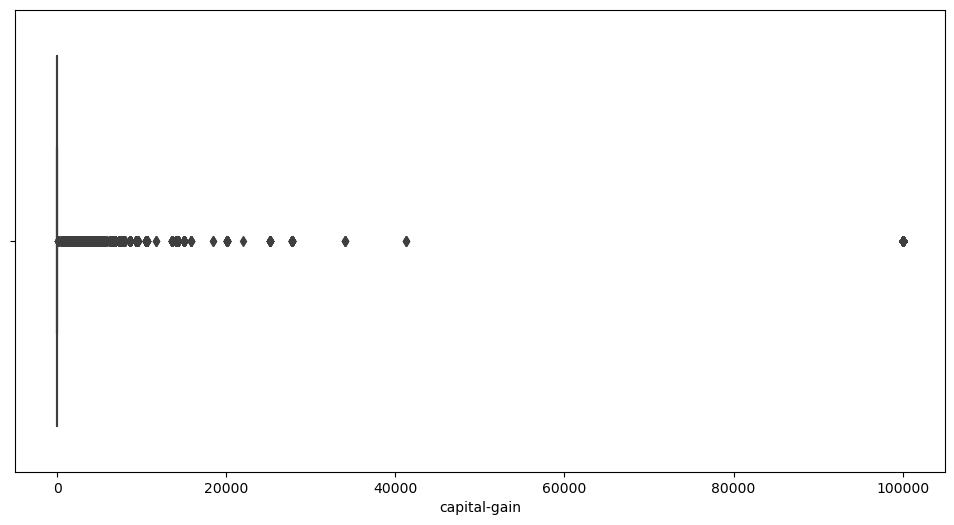

In [22]:
plt.figure(figsize = (12, 6))
sns.boxplot(data=train_df, x = 'capital-gain')

<AxesSubplot:xlabel='capital-loss'>

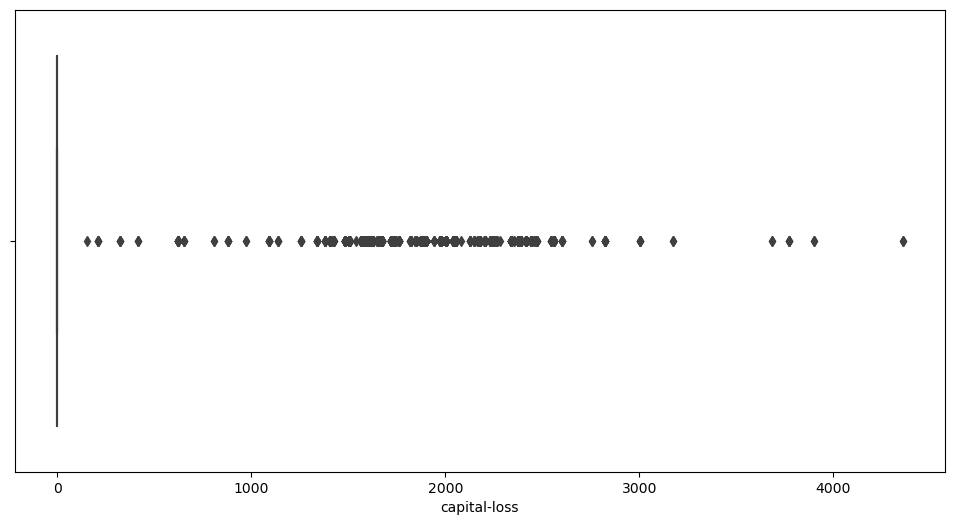

In [23]:
plt.figure(figsize = (12, 6))
sns.boxplot(data=train_df, x = 'capital-loss')

We will delete column 'capital-loss' and column 'capital-gain' because the  and median are 0 and  75% quartile is 0 and we see a lot of outliers on boxplot. These signs are uninformative.

In [24]:
train_df = train_df.drop('capital-loss', axis = 1)
train_df = train_df.drop('capital-gain', axis = 1)
train_df.columns

Index(['age', 'education', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'hours-per-week', 'income_>50K'],
      dtype='object')

<AxesSubplot:>

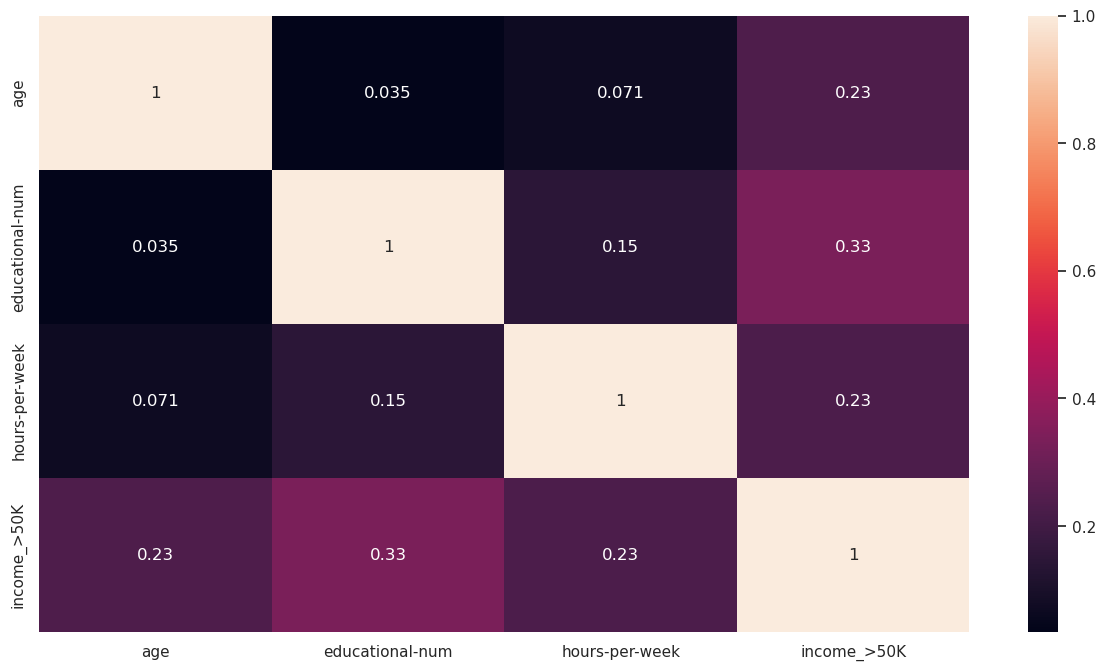

In [25]:
# #Let's look at the correlation heat map
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(train_df.corr(), annot = True)

Multicollinearity is not observed

In [26]:
profile = pp.ProfileReport(train_df, title="Profiling Report")

In [27]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
# we will remove the "education" attribute, because there is a large correlation with the "educational-num" attribute
train_df = train_df.drop('education', axis = 1)
train_df.columns

Index(['age', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'hours-per-week', 'income_>50K'],
      dtype='object')

<AxesSubplot:xlabel='income_>50K', ylabel='age'>

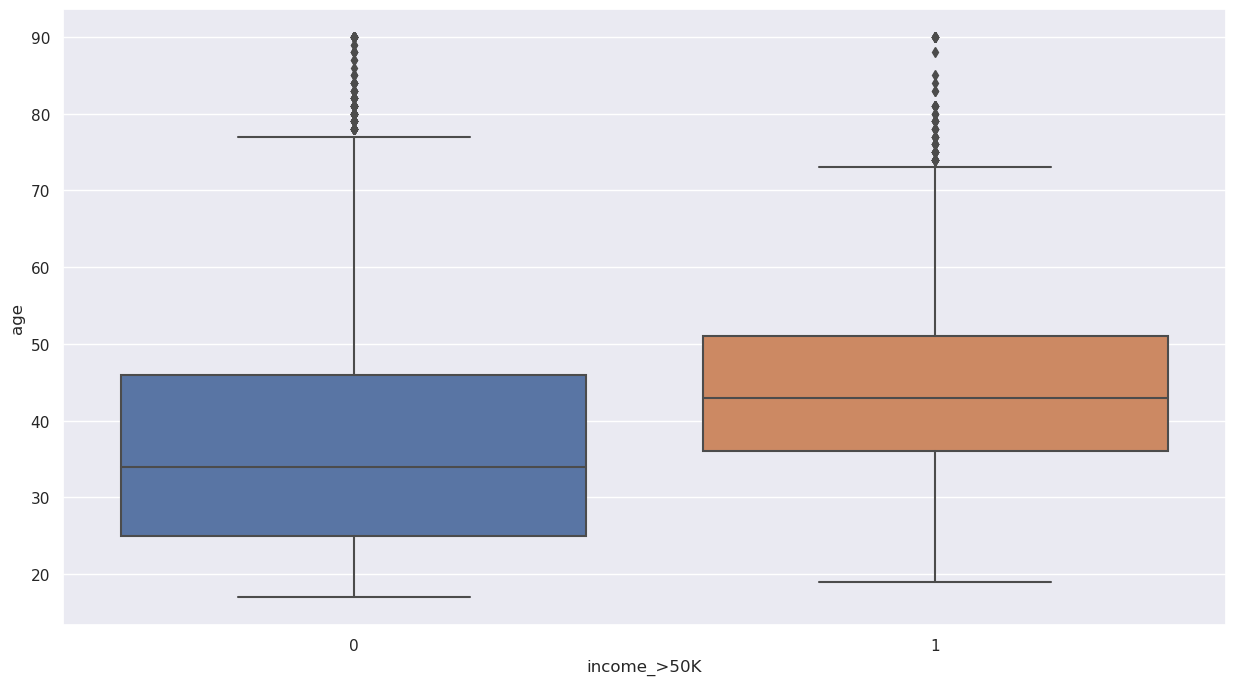

In [29]:
# let's see how age affects income
sns.boxplot(data = train_df, x='income_>50K', y='age')

People who will receive more than 50 thousand dollars a year are older than those who do not receive.

<AxesSubplot:xlabel='income_>50K', ylabel='count'>

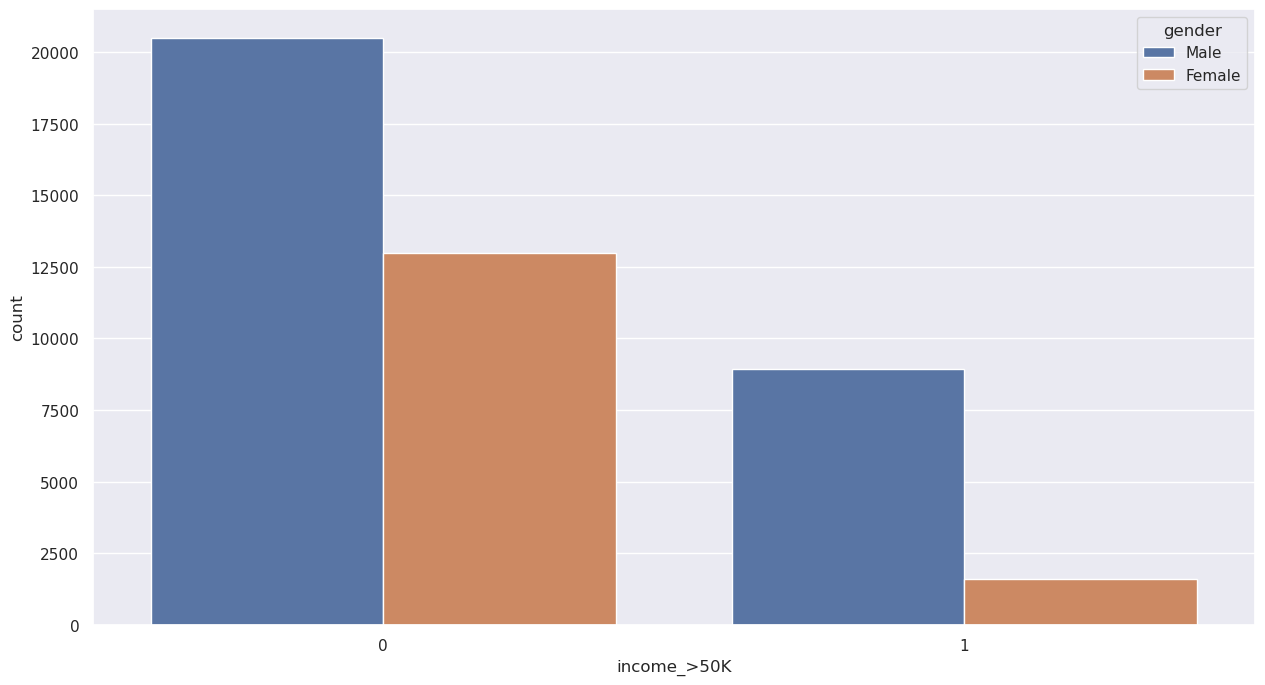

In [30]:
sns.countplot(data = train_df, x = 'income_>50K' , hue  ='gender')

Of those people who receive more than 50 thousand dollars a year, most are men.

In [31]:
# Let's highlight numerical and categorical features
num_cols = [ col for col in list(train_df.columns) if train_df[col].dtype !='object'  and  col != 'income_>50K']
cat_columns = [col for col in list(train_df.columns) if train_df[col].dtype =='object']
print('Categorical features:',cat_columns)
print('Numeric features:',num_cols)

Categorical features: ['marital-status', 'occupation', 'relationship', 'race', 'gender']
Numeric features: ['age', 'educational-num', 'hours-per-week']


In [32]:
# Let's see the size of our table
train_df.shape

(43957, 9)

In [33]:
# Let's convert categorical features to numeric ones
df_dummy = pd.get_dummies(train_df[cat_columns])
df_dummy.shape

(43957, 35)

In [34]:
# Let's put categorical and numeric features together into one DataFrame
final_df = pd.DataFrame()
final_df = pd.concat([df_dummy , train_df[num_cols] , train_df['income_>50K'] ] , axis = 1)
final_df.shape

(43957, 39)

In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   marital-status_Divorced               43957 non-null  uint8
 1   marital-status_Married-AF-spouse      43957 non-null  uint8
 2   marital-status_Married-civ-spouse     43957 non-null  uint8
 3   marital-status_Married-spouse-absent  43957 non-null  uint8
 4   marital-status_Never-married          43957 non-null  uint8
 5   marital-status_Separated              43957 non-null  uint8
 6   marital-status_Widowed                43957 non-null  uint8
 7   occupation_Adm-clerical               43957 non-null  uint8
 8   occupation_Armed-Forces               43957 non-null  uint8
 9   occupation_Craft-repair               43957 non-null  uint8
 10  occupation_Exec-managerial            43957 non-null  uint8
 11  occupation_Farming-fishing            439

In [36]:
# Check for missing values
final_df.isna().sum().sum()

0

In [37]:
# Split the data into training and test data in the proportion of 70/30
from sklearn.model_selection import train_test_split 
X = final_df.drop('income_>50K', axis =1)
y = final_df['income_>50K']
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.3, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(30769, 38)
(13188, 38)


# DecisionTreeClassifier

In [38]:
# Let's build a model decision tree from the library scikit-learn
from sklearn.tree import DecisionTreeClassifier  
DecisionTree = DecisionTreeClassifier(criterion='gini')  
DecisionTree.fit(X_train, y_train) 

DecisionTreeClassifier()

In [39]:
# Predict the values
y_pred_1 = DecisionTree.predict(X_test)
y_pred_1

array([1, 1, 0, ..., 0, 0, 0])

In [40]:
mae_1 = np.mean(abs(y_pred_1-y_test))
rmse_1 = np.sqrt(np.mean((y_pred_1-y_test)**2))
rae_1 = np.mean(abs(y_pred_1-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse_1 = np.mean((y_pred_1-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
r2_1 = DecisionTree.score(X_test, y_test)

In [41]:
# Let's look at the main indicators of the quality of the model
print("The R-squared value is: {0:0.4f}".format(r2_1))
print("Mean Absolute Error: {0:0.6f}".format(mae_1)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse_1)) 
print("Relative Absolute Error: {0:0.6f}".format(rae_1)) 
print("Relative Squared Error: {0:0.6f}".format(rse_1)) 

The R-squared value is: 0.7854
Mean Absolute Error: 0.214589
Root Mean Squared Error: 0.463238
Relative Absolute Error: 0.593807
Relative Squared Error: 1.187615


# KNeighborsClassifier

In [42]:
# Let's build a model KNeighborsClassifier from the library scikit-learn
from sklearn.neighbors import KNeighborsClassifier
KNClassifier = KNeighborsClassifier(n_neighbors= 3)  
KNClassifier.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [43]:
# Predict the values
y_pred_2 = KNClassifier.predict(X_test)  
y_pred_2

array([1, 1, 0, ..., 0, 0, 0])

In [44]:
mae_2 = np.mean(abs(y_pred_2-y_test))
rmse_2 = np.sqrt(np.mean((y_pred_2-y_test)**2))
rae_2 = np.mean(abs(y_pred_2-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse_2 = np.mean((y_pred_2-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
r2_2 = KNClassifier.score(X_test, y_test)

In [45]:
# Let's look at the main indicators of the quality of the model
print("The R-squared value is: {0:0.4f}".format(r2_2))
print("Mean Absolute Error: {0:0.6f}".format(mae_2))
print("Root Mean Squared Error: {0:0.6f}".format(rmse_2)) 
print("Relative Absolute Error: {0:0.6f}".format(rae_2)) 
print("Relative Squared Error: {0:0.6f}".format(rse_2)) 

The R-squared value is: 0.8032
Mean Absolute Error: 0.196846
Root Mean Squared Error: 0.443673
Relative Absolute Error: 0.544708
Relative Squared Error: 1.089416


# LogisticRegression

In [46]:
# Let's build a model LogisticRegression from the library scikit-learn
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(random_state=0)
LG.fit(X_train, y_train) 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [47]:
# Predict the values
y_pred_3 = LG.predict(X_test)
y_pred_3 

array([1, 0, 0, ..., 1, 0, 0])

In [48]:
mae_3 = np.mean(abs(y_pred_3-y_test))
rmse_3 = np.sqrt(np.mean((y_pred_3-y_test)**2))
rae_3 = np.mean(abs(y_pred_3-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse_3 = np.mean((y_pred_3-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
r2_3 = LG.score(X_test, y_test)

In [49]:
# Let's look at the main indicators of the quality of the model
print("The R-squared value is: {0:0.4f}".format(r2_3)) 
print("Mean Absolute Error: {0:0.6f}".format(mae_3)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse_3)) 
print("Relative Absolute Error: {0:0.6f}".format(rae_3)) 
print("Relative Squared Error: {0:0.6f}".format(rse_3)) 

The R-squared value is: 0.8298
Mean Absolute Error: 0.170155
Root Mean Squared Error: 0.412498
Relative Absolute Error: 0.470849
Relative Squared Error: 0.941699


# GradientBoostingClassifier

In [50]:
# Let's build a model GradientBoostingClassifier from the library scikit-learn
from sklearn.ensemble import GradientBoostingClassifier  
GBC = GradientBoostingClassifier()  
GBC.fit(X_train, y_train) 

GradientBoostingClassifier()

In [51]:
# Predict the values
y_pred_4 = GBC.predict(X_test)
y_pred_4

array([1, 0, 0, ..., 1, 0, 0])

In [52]:
mae_4 = np.mean(abs(y_pred_4-y_test))
rmse_4 = np.sqrt(np.mean((y_pred_4-y_test)**2))
rae_4 = np.mean(abs(y_pred_4-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse_4 = np.mean((y_pred_4-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
r2_4 = GBC.score(X_test, y_test)

In [53]:
# Let's look at the main indicators of the quality of the model
print("The R-squared value is: {0:0.4f}".format(r2_4)) 
print("Mean Absolute Error: {0:0.6f}".format(mae_4)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse_4)) 
print("Relative Absolute Error: {0:0.6f}".format(rae_4)) 
print("Relative Squared Error: {0:0.6f}".format(rse_4)) 

The R-squared value is: 0.8386
Mean Absolute Error: 0.161435
Root Mean Squared Error: 0.401789
Relative Absolute Error: 0.446719
Relative Squared Error: 0.893439


# RandomForestClassifier

In [54]:
# Let's build a model RandomForestClassifier from the library scikit-learn
from sklearn.ensemble import RandomForestClassifier  
RFC = RandomForestClassifier()  
RFC.fit(X_train, y_train) 

RandomForestClassifier()

In [55]:
# Predict the values
y_pred_5 = RFC.predict(X_test) 
y_pred_5 

array([1, 1, 0, ..., 1, 0, 0])

In [56]:
mae_5 = np.mean(abs(y_pred_5-y_test))
rmse_5 = np.sqrt(np.mean((y_pred_5-y_test)**2))
rae_5 = np.mean(abs(y_pred_5-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse_5 = np.mean((y_pred_5-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
r2_5 = RFC.score(X_test, y_test)

In [57]:
# Let's look at the main indicators of the quality of the model
print("The R-squared value is: {0:0.4f}".format(r2_5)) 
print("Mean Absolute Error: {0:0.6f}".format(mae_5)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse_5)) 
print("Relative Absolute Error: {0:0.6f}".format(rae_5)) 
print("Relative Squared Error: {0:0.6f}".format(rse_5)) 

The R-squared value is: 0.8118
Mean Absolute Error: 0.188201
Root Mean Squared Error: 0.433822
Relative Absolute Error: 0.520788
Relative Squared Error: 1.041576


# CatBoost

In [58]:
# Set library of catboost
!pip install catboost

**Library CatBoostClassifier can work with categorical feature**

In [59]:
# Split the data into training and test data in the proportion of 70/30
X = train_df.drop('income_>50K', axis =1)
y = train_df['income_>50K']
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.3, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(30769, 8)
(13188, 8)


In [60]:
X.dtypes

age                 int64
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
hours-per-week      int64
dtype: object

In [61]:
# Let's create a list of categorical features
cat_feature_type = np.where(X.dtypes == 'object')[0]
cat_feature_type

array([2, 3, 4, 5, 6])

In [62]:
# Let's build a model CatBoostClassifierfrom the library catboost
from catboost import CatBoostClassifier
CatBoost=CatBoostClassifier(iterations=100, depth=3, learning_rate=0.1)
CatBoost.fit(X_train, y_train, cat_features=cat_feature_type)

0:	learn: 0.6526402	total: 68.5ms	remaining: 6.79s
1:	learn: 0.6193771	total: 77.6ms	remaining: 3.8s
2:	learn: 0.5918770	total: 85.2ms	remaining: 2.75s
3:	learn: 0.5620658	total: 92ms	remaining: 2.21s
4:	learn: 0.5366218	total: 98.1ms	remaining: 1.86s
5:	learn: 0.5148280	total: 104ms	remaining: 1.63s
6:	learn: 0.4962100	total: 110ms	remaining: 1.46s
7:	learn: 0.4802529	total: 116ms	remaining: 1.33s
8:	learn: 0.4662789	total: 122ms	remaining: 1.23s
9:	learn: 0.4541305	total: 128ms	remaining: 1.15s
10:	learn: 0.4437352	total: 134ms	remaining: 1.08s
11:	learn: 0.4347089	total: 140ms	remaining: 1.02s
12:	learn: 0.4266984	total: 146ms	remaining: 976ms
13:	learn: 0.4194744	total: 152ms	remaining: 934ms
14:	learn: 0.4131692	total: 158ms	remaining: 896ms
15:	learn: 0.4078147	total: 164ms	remaining: 861ms
16:	learn: 0.4028368	total: 170ms	remaining: 829ms
17:	learn: 0.3987295	total: 176ms	remaining: 801ms
18:	learn: 0.3948013	total: 182ms	remaining: 775ms
19:	learn: 0.3912732	total: 188ms	remai

In [63]:
# Predict the values
y_pred_6 = CatBoost.predict(X_test)
y_pred_6

array([1, 0, 0, ..., 1, 0, 0])

In [64]:
mae_6 = np.mean(abs(y_pred_6-y_test))
rmse_6 = np.sqrt(np.mean((y_pred_6-y_test)**2))
rae_6 = np.mean(abs(y_pred_6-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse_6 = np.mean((y_pred_6-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
r2_6 = CatBoost.score(X_test, y_test)

In [65]:
# Let's look at the main indicators of the quality of the model
print("The R-squared value is: {0:0.4f}".format(r2_6)) 
print("Mean Absolute Error: {0:0.6f}".format(mae_6)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse_6)) 
print("Relative Absolute Error: {0:0.6f}".format(rae_6)) 
print("Relative Squared Error: {0:0.6f}".format(rse_6)) 

The R-squared value is: 0.8362
Mean Absolute Error: 0.163785
Root Mean Squared Error: 0.404704
Relative Absolute Error: 0.453224
Relative Squared Error: 0.906448


# Сonclusions

In [66]:
def result_models():
    models = ['DecisionTreeClassifier', 'KNeighborsClassifier', 
             'LogisticRegression', 'GradientBostingClassifier', 
             'Rando,ForestClassifier', 'CatBoostClassifier']
    mae = [mae_1, mae_2, mae_3, mae_4, mae_5, mae_6]
    rmse = [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6]
    rae = [rae_1, rae_2, rae_3, rae_4, rae_5, rae_6]
    rse = [rse_1, rse_2, rse_3, rse_4, rse_5, rse_6]
    r2 = [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6]
    
    data = [mae, rmse, rae, rse, r2]
    df = pd.DataFrame(data).T
    df.columns = ['mae','rmse', 'rae', 'rse', 'r2']
    df.insert(0,'model', models)
    return df

In [67]:
# Let's create a table with the results of all models
result_models = result_models()
result_models

,model,mae,rmse,rae,rse,r2
0,DecisionTreeClassifier,0.214589,0.463238,0.593807,1.187615,0.785411
1,KNeighborsClassifier,0.196846,0.443673,0.544708,1.089416,0.803154
2,LogisticRegression,0.170155,0.412498,0.470849,0.941699,0.829845
3,GradientBostingClassifier,0.161435,0.401789,0.446719,0.893439,0.838565
4,"Rando,ForestClassifier",0.188201,0.433822,0.520788,1.041576,0.811799
5,CatBoostClassifier,0.163785,0.404704,0.453224,0.906448,0.836215


In [68]:
min_mae = result_models.mae.min()
min_rmse = result_models.rmse.min()
min_rae = result_models.rae.min()
min_rse = result_models.rse.min()
max_r2 = result_models.r2.max()

In [69]:
# Show the name of the best models for each assessment
print(result_models['model'][result_models.mae == min_mae])
print(result_models['model'][result_models.rmse == min_rmse])
print(result_models['model'][result_models.rae == min_rae])
print(result_models['model'][result_models.rse == min_rse])
print(result_models['model'][result_models.r2 == max_r2])

3    GradientBostingClassifier
Name: model, dtype: object
3    GradientBostingClassifier
Name: model, dtype: object
3    GradientBostingClassifier
Name: model, dtype: object
3    GradientBostingClassifier
Name: model, dtype: object
3    GradientBostingClassifier
Name: model, dtype: object


In [70]:
# Let's show the values of the estimates to the best model
print("The R-squared value is: {0:0.4f}".format(max_r2)) 
print("Mean Absolute Error: {0:0.6f}".format(min_mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(min_rmse))
print("Relative Absolute Error: {0:0.6f}".format(min_rae)) 
print("Relative Squared Error: {0:0.6f}".format(min_rse)) 

The R-squared value is: 0.8386
Mean Absolute Error: 0.161435
Root Mean Squared Error: 0.401789
Relative Absolute Error: 0.446719
Relative Squared Error: 0.893439


Based on the results of the conducted research and the construction of various classification models of machine learning, such as: 'DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'GradientBostingClassifier', 'Rando,ForestClassifier', 'CatBoostClassifier' - according to all indicators 'mae', 'rmse', 'rae', 'rse', 'r2', model', 'GradientBostingClassifier' from the scikit-learn library showed the best result.